                                K-Means
-> O k-means é um algoritmo de aprendizado não supervisionado usado para
resolver problemas de agrupamento (clustering)

    -> Não supervisionado: Significa que você não precisa de dados rotulados
    (ou seja, não precisa dizer ao algoritmo o que é certo ou errado). Você
    apenas fornece os dados brutos, e o algoritmo encontra os padrões e 
    estruturas por conta própria.

    -> Agrupamento: O objetivo é dividir um conjunto de dados em k grupos
    distintos, onde K é um número predefinido por você. O algoritmo garante
    que os pontos em um mesmo grupo (ou cluster) sejam mais parecidos entre
    si do que com os pontos de dados de outros grupos.


                            Para que serve?
-> O k-means é usado principalmente para:

    -> 1. Segmentação de clientes: Separar clientes com base em hábitos
    de compra ou dados demográficos.

    -> 2. Análise de dados: Identificar grupos naturais ou anomalias em
    um grande conjunto de dados.

    -> 3. Processamento de imagem: Agrupar pixels de cores semelhantes para
    compressão ou segmentação de imagens.


                    Como o k-means funciona (o algoritmo)
-> 1.Inicialização

    -> Você escolhe o número de grupos que deseka formar (o valor de k).

    -> O algoritmo seleciona k pontos aleatórios nos dados. Esses pontos
    são chamados de centroides (o centro inicial de cada grupo).

-> 2.Atribuição (Clustering)

    -> Para cada ponto de dado no seu conjunto, o algoritmo calcula a 
    distância desse ponto para todos os k centroides

    -> O ponto de dado é, então, atribuido ao centroide mais próximo.
    Isso forma os k grupos inciais.

-> 3 Atualização (Movimento dos centroides)

    -> Depois que todos os pontos são atribuidos, os centroides originais
    são removidos.

    -> O novo centroide de cada grupo é calculado como a média (o mean, 
    por isso o nome k-means) de todos os pontos de dado que foram atribuidos
    aquele grupo.

-> 4.Repetição

    -> Os passos 2 e 3 são repetidos continuamente: 

        -> Reatribuir todos os pontos de dado aos seus novos centroides
        mais próximos.

        -> Recalcular a posição dos centroides (o novo ponto médio)

-> Condição de parada

    -> O processo para quando:

        -> Os centroides nao se movem significativamente em relação ao
        passo anterior.

        -> Nenhum ponto de dado muda de grupo

        -> O número máximo de iterações (predefinido) é atigindo.

-> O resultado final são k grupos onde a variação (distância) entre os
pontos dentro de cada grupo é minimizada.

Import das bibliotecas necessárias

In [1]:
# Import da biblioteca que irá acessar e manipular os dados
import pandas as pd

# Import da biblioteca que irá manipular arrays e realizar cálculos
# matemáticos
import numpy as np

# Biblioteca que permite a construção e visualização de gráficos
import matplotlib.pyplot as plt

# Import da classe kmeans da biblioteca cluster do módulo sklearn
from sklearn.cluster import KMeans

# Import do meu arquivo de funções
from minhasfuncoes import funcoes

Acessando a base de dados usando o pandas

In [2]:
# O delimiter representa o sinal que separa os dados no dataset 
base_de_dados = pd.read_csv('Dados/svbr.csv', delimiter=';')

Visualizando o dataset

In [3]:
base_de_dados.head(47)

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0
6,Delta T - Os super lentos,12000.0,171361.0
7,Bláblálogia,161951.0,11027386.0
8,Efarsas,78876.0,6226235.0
9,Minuto da Terra,274196.0,30166457.0


Função que irá preencher os dados faltantes usando o simple imputer

In [4]:
# base_de_dados.to_numpy: Ira converter o  Dataframe Pandas em um array numpy
# (formato que precisamos para utilizar a função preencherDadosFaltantes)
# 1: Indice da coluna inicial que será preenchida com  a média dos valores.
# 1: Indice final da coluna que será preenchida com a média dos valores 
base_de_dados_array = funcoes.preencherDadosFaltantes(base_de_dados.to_numpy(), 1, 1)

Visualizando as informações gerais do dataset

In [5]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


Como estamos lidando com visualizações e inscrições, será mais eficiente
convertemos valores do tipo float para valores inteiros 

In [6]:
# Irá selecionar apenas a segunda coluna do nosso dataset e irá converter
# os valores para inteiro usando a função astype da biblioteca numpy.
base_de_dados_array[:,1] = base_de_dados_array[:, 1].astype("int")

# Irá preencher os valores faltantes das colunas 1 e 2 usando a média dos
# valores
base_de_dados_array = funcoes.preencherDadosFaltantes(base_de_dados_array, 1, 2)

# Irá selecionar apenas a terceira coluna e irá converter os dados de float
# para int usando a função astype do numpy
base_de_dados_array[:, 2] = base_de_dados_array[:, 2].astype("int")

Para facilitar a construção do nosso algoritmo kmeans, vamos criar um DataFrame
utilizando apenas as colunas numéricas do dataset (inscrições e visualizações)

In [7]:
# Até onde entendi, a linha 30 era o local que possuia valores nulos,
# dito isso, como preenchemos esse valor faltante no array numpy da nossa
# base de dados, vamos atribuir esse valor preenchido de volta na base de
# dados com o objetivo de atualizar o valor da linha 30.
# at: Função do pandas que tem como objetivo atualizar os dados de uma
# linha. A função recebe como argumento  o numero da linha que será
# atualizada e a coluna da linha (No nosso caso, atualizaremos a linha 30
# das 2 colunas)
base_de_dados.at[30, 'Inscritos'] = base_de_dados_array[30][1]

base_de_dados.at[30, 'Visualizações'] = base_de_dados_array[30][2]

# Agora que ja preparamos toda a base de dados, vamos construir um DataFrame
# que irá conter apenas os valores numéricos (e preenchidos corretamente)
# da base de dados com o objetivo de conter facilitar a construção do 
# algoritmo.

# 'Inscritos': base_de_dados_array[:, 1]: A coluna 'Inscritos' irá conter
# apenas a segunda coluna do array.

# 'Visualizações': base_de_dados_array[:, 2]: Ira conter apenas a terceira
# coluna (ultima coluna) do array.
x = pd.DataFrame({'Inscritos': base_de_dados_array[:, 1], 'Visualizações': base_de_dados_array[:, 2]})

# Ira mostrar a base de dados construida
x.head(47)

,Inscritos,Visualizações
0,13438.0,406590
1,35241.0,868235
2,31680.0,2856508
3,25100.0,150000
4,32788.0,1575456
5,65453.0,1667892
6,12000.0,171361
7,161951.0,11027386
8,78876.0,6226235
9,274196.0,30166457


Visualizando informações gerais do dataset

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Inscritos      47 non-null     object
 1   Visualizações  47 non-null     object
dtypes: object(2)
memory usage: 884.0+ bytes


Construção do modelo kmeans

100%|██████████| 10/10 [00:01<00:00,  8.88it/s]


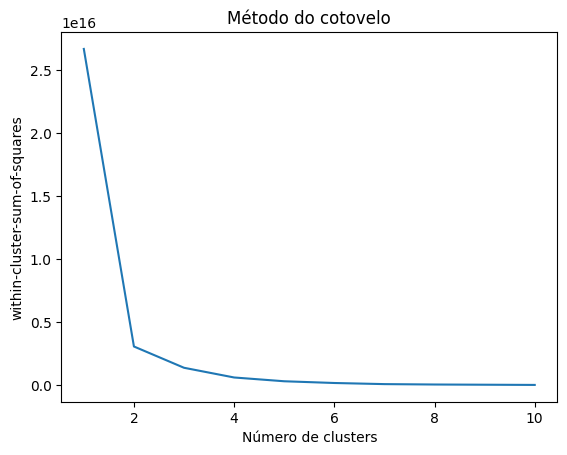

In [9]:
# Import da biblioteca tqdm que tem como objetivo construir barras de progresso
# em loops
import tqdm

# Cria uma lista vázia chamada wcss (within-cluster sum of squares). Esta
# lista armazenara á medida de qualidade de cada modelo (para k = 1 até k = 10)
wcss = []

# Construção for que irá executar a construção do kmeans 10 vezes
# com a barra de progresso
for i in tqdm.tqdm(range(1, 11)):
    
    # Irá instanciar a classe kmeans para cada valor de k (de i = 1 até i = 10
    # ).
    # n_clusters = i: Define o numero de clusters (agrupamento) para a iteração
    # atual (valor de i)
    # init = 'kmeans++':Usa um método inteligente para selecionar os centroides
    # iniciais, evitando o problema de má inicialização.
    # max_iter = 300: Define o numero máximo de iterações que o algoritmo fará
    # para ajustar os centroides. O valor padrão é 300
    # n_init: Significa que o k-means será executado 10 vezes com diferentes 
    # inicializações e o algoritmo escolhera o melhor. 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    
    # Ira aplicar o k-menas nos dados do dataset que criamos anteriormente
    kmeans.fit(x)
    
    # Adiciona o valor de inertia_ (inércia) do modelo treinado a lista wcss. 
    # A inertia mede a soma das distâncias quadráticas de cada ponto ao centroide de seu cluster. Quanto menor o wcss, mais coesos são os clusters
    wcss.append(kmeans.inertia_)
    
# Plota a linha: cria um gráfico de linhas que irá conter o numero de clusters
# (grupos ou agrupamentos) e a lista de valores da inertia (wcss)
plt.plot(range(1, 11), wcss)

# Titulo do grafico
plt.title("Método do cotovelo")

# Rótulo do eixo x
plt.xlabel('Número de clusters')

# Rótulo do eixo y
plt.ylabel('within-cluster-sum-of-squares')

# Exibição do gráfico
plt.show()

                                Interpretação do gráfico

-> Para interpretar o gráfico devemos observar em qual numero de clusters a margem de erro (valor da inertia) começa a cair(curva do gráfico). Ao encontrar esse valor, teremos o número de clusters (agrupamentos) necessários para realizar a classificação.

-> No nosso caso, o valor ideal de cluster e´o 3 (onde o numero de erros
começa a cair).

Aplicando o kmeans nos dados

In [ ]:
# Irá padronizar os dados com o objetivo de eliminar dados discrepantes
# x_normalizado: Recebe o DataFrame com os dados padronizados, que agora
# têm média zero e desvio padrão um.

# escala: Recebe o objeto StandardScaler treinado. Ele é importante para
# padronizar novos dados no futuro (em produção).

# Normalizacao: Função do nosso arquivo de funções que irá padronizar os
# dados.
x_normalizado, escala = funcoes.normalizacao(x)

# Instância da classe KMeans. O construtor irá receber como argumento:
# n_clusters: Irá conter a quantidade de grupos que iremos classificar
# (quantidade descoberta através do gráfico de cotovelo)

# init: Modelo que irá classificar os dados

# max_iter: Quantidade de vezes que ele irá alterar a posição dos pontos
# (centróides)

# n_init: Quantidade de vezes que o kmeans será executado.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)

# Ira treinar e aplicar o algoritmo nos dados padronizados anteriormente
clusters = kmeans.fit_predict(x_normalizado)

# Ira apresentar o resultado das classificações
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [ ]:
# Irá criar uma nova coluna na base de dados que irá conter as classificações
# do algoritmo
base_de_dados['cluster'] = clusters

# Irá visualizar todas as 47 linhas da base de dados
base_de_dados.head(47)

,Canal,Inscritos,Visualizações,cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
9,Minuto da Terra,274196.0,30166457.0,2


In [12]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
 3   cluster        47 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.4+ KB


Visualizando apenas os dados classificados como 0


In [13]:
boolArray = base_de_dados['cluster'] == 0

base_de_dados[boolArray]

,Canal,Inscritos,Visualizações,cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
10,Canal Cura Quântica,13148.0,250020.0,0


Visualizando apenas os dados classificados como 1

In [25]:
boolArray = base_de_dados['cluster'] == 1

base_de_dados[boolArray]

,Canal,Inscritos,Visualizações,cluster
18,Matemática Rio com Prof Rafael Procópio,1423056.0,93036517.0,1
32,Canal do Pirula,752573.0,76462787.0,1
39,Schwarza - Poligonautas,860493.0,118741623.0,1


Visualizando apenas os dados classificados como 2

In [16]:
boolArray = base_de_dados['cluster'] == 2

base_de_dados[boolArray]

,Canal,Inscritos,Visualizações,cluster
9,Minuto da Terra,274196.0,30166457.0,2
23,Minutos Psíquicos,648892.0,22555134.0,2
26,Papo de Biólogo,374057.0,12139385.0,2
29,SpaceToday,321068.0,26277335.0,2
30,Ciência todo dia,528761.0,16969332.0,2


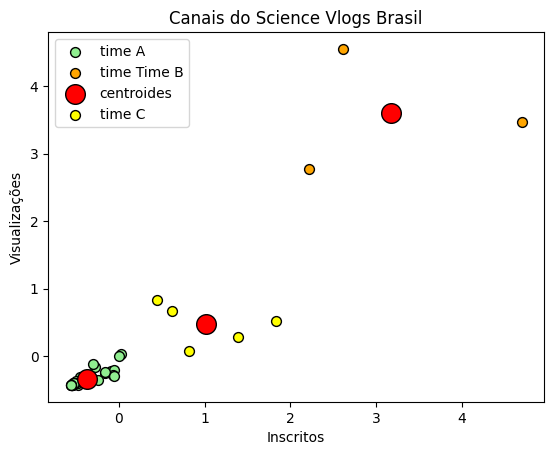

In [ ]:
# Ira plotar os pontos do 1° Grupo (grupo 0)
plt.scatter(
    # x_normalizado[clusters == 0, 0]: Eixo X. Usa a indexação booleana
    # para selecionar apenas as linhas do array x_normalizado onde o clusters
    # é igual a 0, e plota os valores da coluna 0 (inscritos) como as
    # coordenadas de x
    
    # 0: Seleciona as linhas do grupo 0
    
    # 0: seleciona os valores da primeira coluna(inscritos)
    
    # x_normalizado[clusters == 0, 1]: Eixo y. Faz o mesmo, mas plota os
    # valores da coluna 1 (visualizações) como as coordenadas de y.
    
    # 0: Seleciona as linhas do primeiro grupo
    # 1: Seleciona os valores da segunda coluna (visualizações).
    x_normalizado[clusters == 0, 0], x_normalizado[clusters == 0, 1],
    # s: Tamanho dos pontos no gráfico
    s=50, 
    # Cor dos pontos no gráfico
    c='lightgreen',
    # Cor da borda dos pontos
    edgecolor='black',
    
    # Rótulo do gráfico
    label='time A'
)

# Ira plotar os grupos do 2° grupo (grupo 1)
plt.scatter(
    
    # x_normalizado[clusters == 1, 0]: Eixo x. Ira selecionar apenas as linhas
    #  do grupo 1 da coluna 0 (coluna de inscritos).
    
    # 1: Seleciona as linhas do segundo grupo
    # 0: Seleciona a primeira coluna (inscritos)
    
    # x_normalizado[clusters == 1, 1]: Eixo Y. Irá selecionar apenas as linhas
    # do grupo 1 coluna  1 (coluna de visualizações).
    
    # 1: Seleciona as linhas do segundo grupo
    
    # 1: Seleciona a segunda coluna (visualizações)
    
    x_normalizado[clusters == 1, 0], x_normalizado[clusters == 1, 1],
    # Define o tamanho dos pontos no gráfico
    s=50, 
    
    # Ira definir a cor dos pontos
    c='orange',
    
    # define a cor da borda dos pontos
    edgecolor='black',
    
    # Rótulo do grupo 1
    label='Time B'
)

# Irá plotar os centróides (dados que serão classificados) no algoritmo
plt.scatter(
    # kmeans.cluster_centers_[:, 0]: Eixo X. O cluster_centers é uma função
    # da classe means que tem como objetivo selecionar um intervalo de
    # centroides. Nesse trecho estamos selecionando todos os centroides
    # da coluna 0(inscritos).
    
    # kmeans.cluster_centers_[:, 1]: Eixo Y. Irá selecionar apenas o
    # intervalo de centroides(dados que serão classificados) da coluna
    # 1 (visualizalões)
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    
    # Define o tamanho dos pontos no gráfico
    s=200,
    
    # Define a cor dos pontos no gráfico
    c='red', 
    
    # Define a cor da borda dos pontos
    edgecolor='black',
    
    # Rótulo do grupo de centróides.
    label='centroides'
)

# Ira plotar os pontos do grupo 2 (terceiro grupo)

# x_normalizado[clusters == 2, 0]. Eixo X. Ira selecionar apenas as linhas
# do terceiro grupo da coluna 0 (inscritos).

# 2: linhas de valores do grupo 2

# 0: seleciona a 1° coluna (inscritos)

# x_normalizado[clusters == 2, 1]: Eixo y. Ira selecionar apenas as linhas
# do terceiro grupo da coluna 1 (visualizações).

# 2: Seleciona as linhas do grupo 2

# 1: Seleciona a 2° coluna (visualizações).

plt.scatter(
    x_normalizado[clusters == 2, 0], x_normalizado[clusters == 2, 1],
    
    # Define o tamanho dos pontos no gráfico
    s=50,
    
    # Cor dos pontos no gráfico
    c='yellow', 
    
    # Cor da borda no gráfico
    edgecolor='black',
    
    # Rótulo do terceiro grupo
    label='time C' 
)

# Define o titulo do gráfico
plt.title("Canais do Science Vlogs Brasil")

# Define o rótulo do eixo x
plt.xlabel("Inscritos")

# Define o rótulo do eixo y
plt.ylabel("Visualizações")

# Define a legenda que especifica para o usuário a cor que representa cada 
# grupo de pontos
plt.legend()

# Irá visualizar o gráfico
plt.show()

Para facilitar a interpretação dos dados, vamos analisar a média de inscritos e visualizações de cada time

In [37]:
analise_clusters = base_de_dados.groupby('cluster')[['Inscritos', 'Visualizações']].mean()

print(round(analise_clusters, 2))

          Inscritos  Visualizações
cluster                           
0          49674.89     1983019.84
1        1012040.67    96080309.00
2         429394.80    21621528.60


                            Interpretação do gráfico

-> Bom, podemos observar que o kmeans classificou os dados de acordo com a sua 
quantidade de inscritos e visualizações.

-> Time A: O time A contém canais que possuem menos de 1 milhão de inscritos
e visualizações (A maioria dos dados).

-> Time B: É composto pela minoria dos dados (em outras circurstâncias poderiam até ser considerados
outliers). Eles possuem visualizações e inscritos na faixa entre 2 e 5 milhões

-> Time C: O grupo B possui 2 tipos de integrantes

    -> Os que se aproximam do 1 milhão: Podemos obeservar que a maioria
    dos canais do grupo B se aproximam do 1 milhão de visualizações. Já 
    a quantidade de inscritos se aproximam do 1 milhão

    -> Os que possuem um pouco mais de 1 milhão de inscritos: Podemos observar
    que a minoria dos canais possuem um pouco mais de 1 milhão de inscritos (alguns alcançaram 2 milhões de inscritos), 
    porém o número de visualizações apenas chega perto do 1 milhão.

-> Podemos observar que, de forma geral, a quantidade de visualizações é próxima da quantidade de
inscritos dos canais presentes em cada grupo (o que é normal)



                        Interpretação dos valores médios
cluster  Inscritos      Visualizações                     
A         49674.89     1983019.84
B        1012040.67    96080309.00
C         429394.80    21621528.6

-> Observando os valores médios, podemos perceber que a interpretação visual
do gráfico esta correta, onde temos: 

-> Time A: Possui o menor numero de inscritos (49674.89) e visualizações (1983019), onde o
numero de visualizações é maior que o numero de inscritos (contrariando a nossa observação
anterior sobre o equilibrio geral entre essas 2 variáveis). 

-> Time B:Possui o maior numero de inscritos ( 1012040.67) e visualizações. Valores que 
ultrapassam 1 milhão, onde o numero de visualizações é bem distante do numero
de inscritos

-> Time C: O time C  teve as suas visualizações bem representadas no gráfico,
pois, o valor 21621528.6 está próximo do que foi representado no gráfico. o valor de inscritos (429394.80) foi bem representado, pois é próximo do 1 milhão. Nesse caso a quantidade de visualizações é discrepante com a quantidade de inscritos dos canais